# Exploratory Analysis

In [32]:
import pandas as pd
import numpy as np
from numpy import log
import statistics
import scipy

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from scripts.helper_functions import *

The Artic Sea Ice Extent (SIE) dataset tracks the total region with at least 15% sea ice cover from 1978 through 2018. This dataset was found on data.world, but its original source is the [National Snow & Ice Data Center](https://nsidc.org/data/explore-data). I chose this dataset because I wanted to look at the effects of climate change. <br><br>
The dataset contains two columns: Date and Extent (million sq km) and contains 12751 samples. The extent column, which is measured in million square kilometers, was record every 2 days between October 1978 and March 2018.

In [33]:
# Importing the data
df = pd.read_csv('./data/arctic_sea_ice_extent.csv')
df.head()

,Date,Extent (million sq km)
0,10/26/1978,10.231
1,10/28/1978,10.420
2,10/30/1978,10.557
3,11/1/1978,10.670
4,11/3/1978,10.777


In [34]:
df.shape

(12751, 2)

## Cleaning

In [35]:
# Copy original dataset
sea_ice_df = df

In [36]:
# Update column names
sea_ice_df = convert_column_names(sea_ice_df)

Reformatted column names: Index(['date', 'extent_million_sq_km'], dtype='object')


The convert_column_names() function converts column names to lowercase, converts spaces to underscores, and removes any non-letter or number characters from the name.

In [37]:
# Save csv
sea_ice_df.to_csv("./data/arctic_sie_clean.csv", index=False)

In [38]:
# Create year and month columns
sea_ice_df['year'] = pd.DatetimeIndex(sea_ice_df['date']).year
sea_ice_df['month'] = pd.DatetimeIndex(sea_ice_df['date']).month

In [39]:
# View the data
sea_ice_df.head(-10)

,date,extent_million_sq_km,year,month
0,10/26/1978,10.231,1978,10
1,10/28/1978,10.420,1978,10
2,10/30/1978,10.557,1978,10
3,11/1/1978,10.670,1978,11
4,11/3/1978,10.777,1978,11
...,...,...,...,...
12736,3/17/2018,14.466,2018,3
12737,3/18/2018,14.349,2018,3
12738,3/19/2018,14.309,2018,3
12739,3/20/2018,14.210,2018,3


## Data Exploration

In [40]:
# Count nulls
sea_ice_df.isna().sum(0)

date                    0
extent_million_sq_km    0
year                    0
month                   0
dtype: int64

No missing values in the dataset. Therefore, no imputation methods are required.

In [41]:
# Count values per year
yearly_sample_count_df = sea_ice_df.groupby('year')['extent_million_sq_km'].count().reset_index(name='measurements_taken')
yearly_sample_count_df.head()

,year,measurements_taken
0,1978,34
1,1979,182
2,1980,183
3,1981,183
4,1982,182


Measurements were taken approximately every 2 days from 1978 to 1987. From 1988 to 2018, there is a daily measurement recorded, which means the frequency of recordings was increased two-fold.

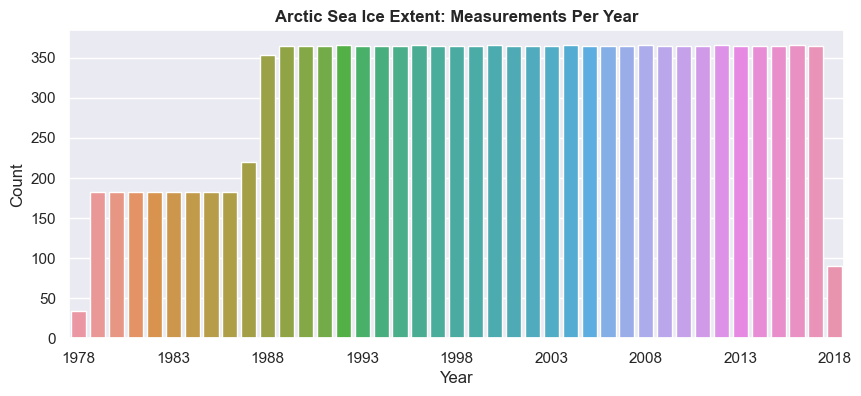

In [56]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,4)})

# Plot number of measurements taken per year
plot_ = sns.barplot(yearly_sample_count_df, x="year", y="measurements_taken")
plt.title('Arctic Sea Ice Extent: Measurements Per Year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Count')

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig('figures/measurements_per_year.png')
plt.show()

### Stationarity and Seasonality Detection

#### Seasonality

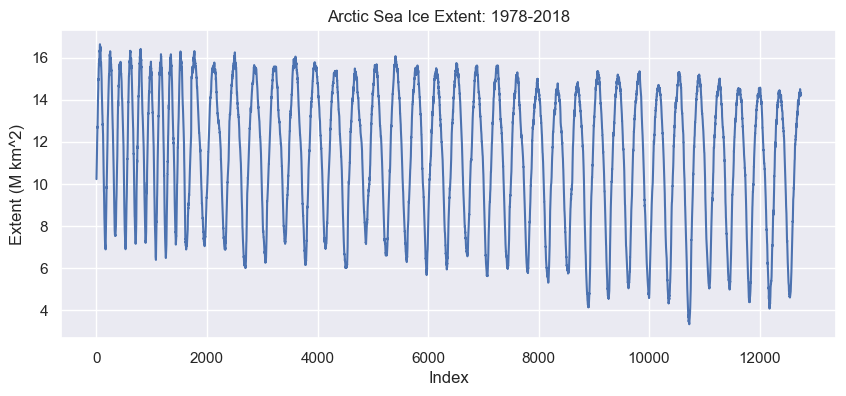

In [58]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,4)})

# Plot time series of SIE
plt.plot(sea_ice_df.index, sea_ice_df['extent_million_sq_km'])
plt.title("Arctic Sea Ice Extent: 1978-2018")
plt.xlabel("Index")
plt.ylabel("Extent (M km^2)")

# Set x-axis tick labels
# ticks = ['1978','1983','1988','1993','2003','2008','2013','2018']
# g.set_xticks(range(len(sea_ice_df)))
# g.get_xticklabels(ticks)

# Save and plot figure
# plt.savefig('figures/ts_1978_2018.png')
plt.show()

The above set is non-stationary as there are clear annual changes in sea ice extent.

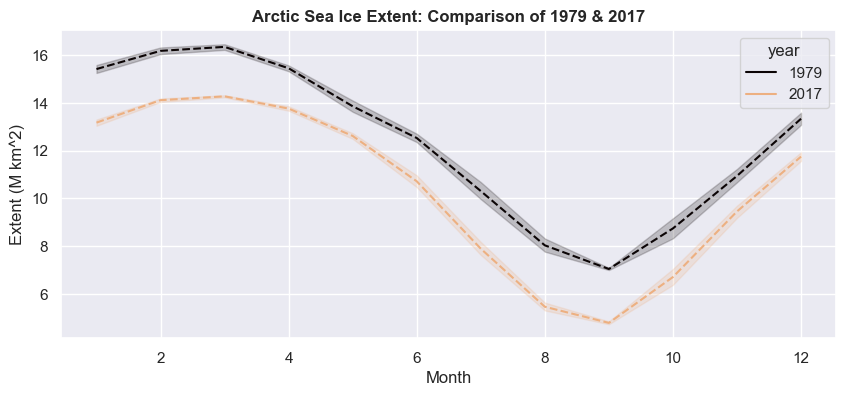

In [44]:
sns.set_style('darkgrid')

# Filtering data for specific years (assuming 'sea_ice_df' is your DataFrame)
sea_ice_1979 = sea_ice_df[sea_ice_df['year'] == 1979]
sea_ice_2017 = sea_ice_df[sea_ice_df['year'] == 2017]

# Create subplots with two rows and one column
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

# Plot for 1978 on the first subplot
sns.lineplot(x='month', y='extent_million_sq_km', data=sea_ice_1979, hue='year', linestyle='dashed', palette='mako', ax=axes)
# Plot for 2018 on the second subplot
sns.lineplot(x='month', y='extent_million_sq_km', data=sea_ice_2017, hue='year', linestyle='dashed', palette='flare', ax=axes)

axes.set_title('Arctic Sea Ice Extent: Comparison of 1979 & 2017', fontweight='bold')
axes.set_xlabel('Month')
axes.set_ylabel('Extent (M km^2)')

# Save and show plot
plt.savefig('figures/period_comparison.png')
plt.show()

By comparing the first full and final years of the set, we observe a decrased local maxima and mimina for the months March and September, respectively. The year 2017 shows an approximate 2 million square kilometer decrease in sea ice extent compared to 1979.

In [45]:
# # Plot
# sns.set_theme(style="darkgrid")

# # Plot each year's time series in its own facet
# g = sns.relplot(data=sea_ice_df, x="month", y="extent_million_sq_km", 
#                 col="year", hue="year", kind="line", palette="crest", 
#                 linewidth=1, zorder=5, col_wrap=3, height=2, aspect=1.5, 
#                 legend=False        
#             )

# # Iterate over each subplot to customize further
# for year, ax in g.axes_dict.items():
#     # Add the title as an annotation within the plot
#     ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

# # Reduce the frequency of the x axis ticks
# ax.set_xticks(ax.get_xticks()[::2])

# # Tweak the supporting aspects of the plot
# plt.title("Arctic Sea Ice Annual Trend")
# g.set_axis_labels("", "Extent (M km^2)")
# g.tight_layout()

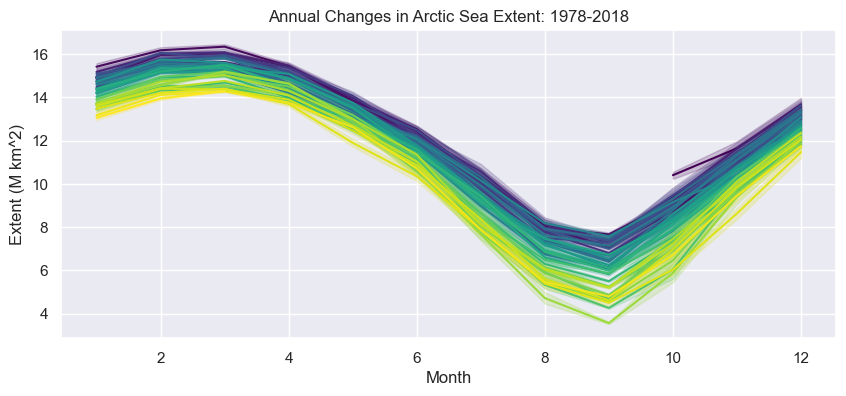

In [46]:
# Plot annual changes in sea ice extent
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,4)})

sns.lineplot(data=sea_ice_df, x="month", y="extent_million_sq_km", hue="year", palette="viridis", legend=False)
plt.title("Annual Changes in Arctic Sea Extent: 1978-2018")
plt.xlabel("Month")
plt.ylabel("Extent (M km^2)")

# Save and show plot
plt.savefig('figures/sie_annual_changes.png')
plt.show()

Furthermore, by including each year in the set, we observe a decrease in sea ice extent year-over-year with darker colors representing older years and shifting to younger years as the colors brighten.

In [47]:
# Average Annual Arctic Sea Ice Extent
avg_sie_df = sea_ice_df.groupby(sea_ice_df['year']).mean().drop(columns=["month"]).reset_index()
avg_sie_df = avg_sie_df[1:-1]
avg_sie_df.head(10)

,year,extent_million_sq_km
1,1979,12.319560
2,1980,12.334148
3,1981,12.135486
4,1982,12.439445
5,1983,12.335896
6,1984,11.912601
7,1985,11.986599
8,1986,12.208224
9,1987,11.397227
10,1988,12.093169


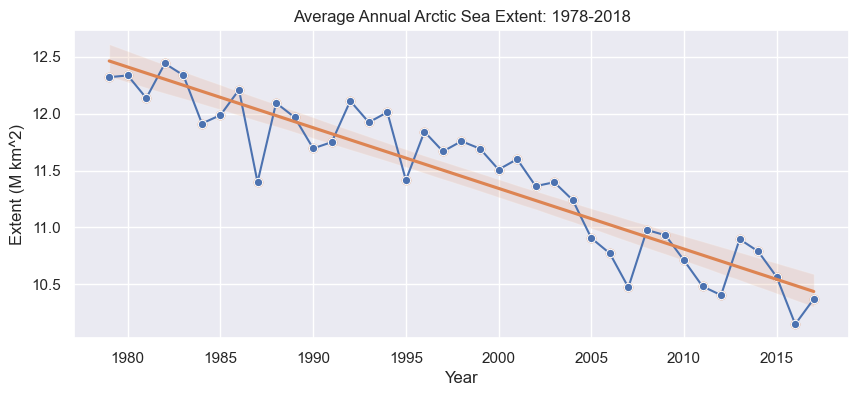

In [55]:
# Plot average annual sea ice extent
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,4)})

sns.lineplot(data=avg_sie_df, x="year", y="extent_million_sq_km", 
             palette="viridis", marker="o", legend=False)
sns.regplot(data=avg_sie_df, x="year", y="extent_million_sq_km")
plt.title("Average Annual Arctic Sea Extent: 1978-2018")
plt.xlabel("Year")
plt.ylabel("Extent (M km^2)")

# Save and show plot
plt.savefig('figures/sie_annual_avg.png')
plt.show()

The above chart displays the average annual sea ice extent where there is a clear decreasing linear trend as we move to more current dates.

#### Normality Testing

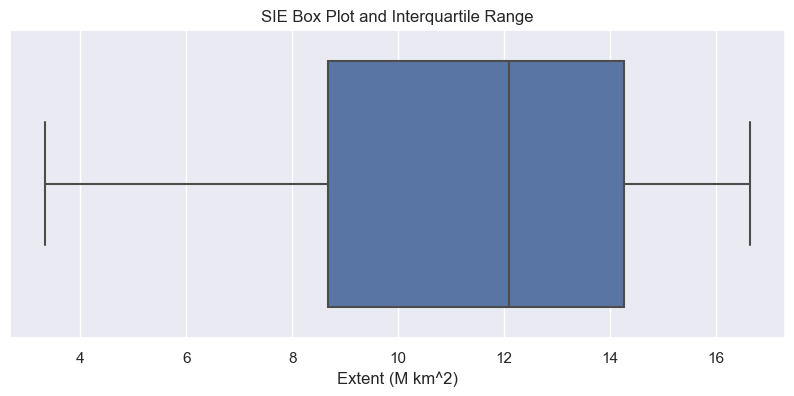

In [48]:
# Outlier detection
plt.subplots(figsize=(10, 4))

sns.boxplot(x=sea_ice_df['extent_million_sq_km'])

plt.title("SIE Box Plot and Interquartile Range")
plt.xlabel("Extent (M km^2)")

plt.savefig("./figures/sie_boxplot.png")
plt.show()

The above box plot shows a median line closer to the 75th Percentile, which indicates a negatively skewed distribution. Additionally, no outliers are observed beyond the box plot whiskers.

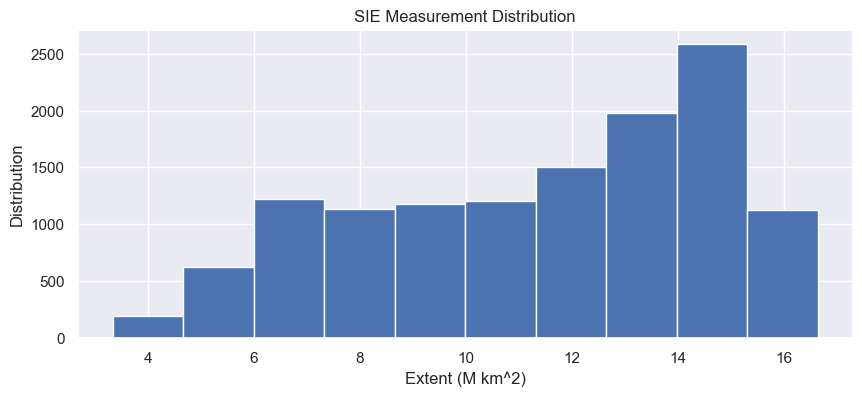

In [49]:
# Histogram of SIE Measurements
plt.subplots(figsize=(10, 4))

sea_ice_df['extent_million_sq_km'].hist()

plt.title("SIE Measurement Distribution")
plt.xlabel("Extent (M km^2)")
plt.ylabel("Distribution")

plt.savefig("./figures/sie_distribution.png")
plt.show()

In [50]:
# Splitting set into 2 equal sequences
X = df['extent_million_sq_km'].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]

# Mean, Median, Mode, and Variance Calculations
mean1, mean2 = round(X1.mean(), 2), round(X2.mean(), 2)
median1, median2 = statistics.median(X1), statistics.median(X2)
mode1, mode2 = statistics.mode(X1), statistics.mode(X2)
var1, var2 = round(X1.var(), 2), round(X2.var(), 2)

print(f'Mean-1: {mean1}, Mean-2: {mean2}')
print(f'Median-1: {median1}, Median-2: {median2}')
print(f'Mode-1: {mode1}, Mode-2: {mode2}')
print(f'Variance-1: {var1}, Variance-2: {var2}')

Mean-1: 11.89, Mean-2: 10.87
Median-1: 12.458, Median-2: 11.715
Mode-1: 15.523, Mode-2: 14.232
Variance-1: 9.31, Variance-2: 11.39


In [51]:
# Mode and Median of Full Data Set
print(f'Mode: {statistics.mode(X)}')
print(f'Median: {statistics.median(X)}')

Mode: 15.396
Median: 12.097


The sea ice extent measurement distribution is non-Gaussian and negatively-skewed. Furthermore, the means for both sequences are less than the observed median and mode -- 12.1 and 15.4, respectively. We also observe a decrease in mean and median, which corresponds to the declining sea ice extent.

In [52]:
# Shapiro-Wilk test for normality testing
scipy.stats.shapiro(X)

ShapiroResult(statistic=0.9360740184783936, pvalue=0.0)

The Shapiro-Wilk test for testing normality finds the test statistic to be 0.936 and a p-value of 0.0. A p-value less than 0.5 for the Shapiro-Wilk test rejects the null hypothesis that data are from a normally distributed population.

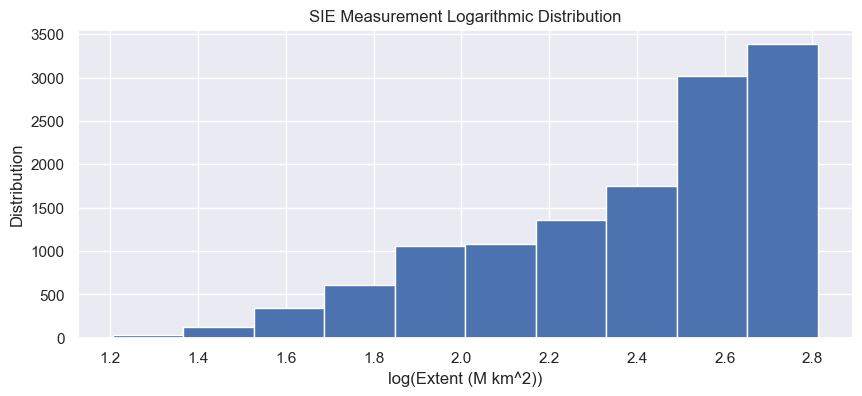

In [53]:
# Distribution of Logarithmic Transform to Flatten Seasonal Exponential Growth
plt.subplots(figsize=(10, 4))

logx = log(sea_ice_df['extent_million_sq_km'])
logx.hist()

plt.title("SIE Measurement Logarithmic Distribution")
plt.xlabel("log(Extent (M km^2))")
plt.ylabel("Distribution")

plt.savefig("./figures/sie_log_distribution.png")
plt.show()
 

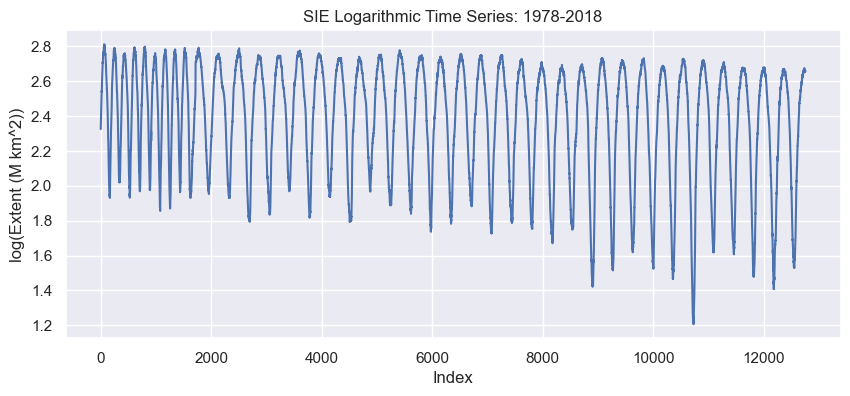

In [54]:
# Linear Plot of Log Transform 
plt.subplots(figsize=(10, 4))

plt.plot(logx)

plt.title("SIE Logarithmic Time Series: 1978-2018")
plt.xlabel("Index")
plt.ylabel("log(Extent (M km^2))")

plt.savefig("./figures/sie_log_ts.png")
plt.show()

One method of removing seasonality and trends is apply a logarithmic scale to the outcome data. The treatment created a smoother distribution, however it also negatively skewed the data further. 